# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make a GET request to the OpenWeatherMap API
        response = requests.get(city_url)
        
        # If the response is successful (status code 200), proceed
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred: {e}. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | nikolayevsk-on-amure
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | batala
Processing Record 9 of Set 1 | leskovac
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | bamboo flat
Processing Record 18 of Set 1 | shahin dezh
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | yambio
Processing Rec

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
print(city_data_df)

# Show Record Count
city_data_df.count()

                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          port elizabeth -33.9180   25.5701    294.44        97          75   
1       port-aux-francais -49.3500   70.2167    280.90        94         100   
2    nikolayevsk-on-amure  53.1406  140.7300    266.58        81          68   
3           marsh harbour  26.5412  -77.0636    296.27        80         100   
4                  albany  42.6001  -73.9662    274.45        72          97   
..                    ...      ...       ...       ...       ...         ...   
582                dakhla  23.6848  -15.9580    289.91        86          98   
583                golere  16.2557  -14.1017    300.70        12          85   
584         mountain home  43.1330 -115.6912    282.86        43          20   
585               weyburn  49.6668 -103.8511    279.27        56          69   
586                  safi  32.1667   -8.8333    283.29        79         100   

     Wind Speed Country        Date  
0

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,294.44,97,75,2.57,ZA,1710118662
1,port-aux-francais,-49.3500,70.2167,280.90,94,100,16.45,TF,1710118662
2,nikolayevsk-on-amure,53.1406,140.7300,266.58,81,68,2.02,RU,1710118662
3,marsh harbour,26.5412,-77.0636,296.27,80,100,7.53,BS,1710118662
4,albany,42.6001,-73.9662,274.45,72,97,3.58,US,1710118489


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,294.44,97,75,2.57,ZA,1710118662
1,port-aux-francais,-49.3500,70.2167,280.90,94,100,16.45,TF,1710118662
2,nikolayevsk-on-amure,53.1406,140.7300,266.58,81,68,2.02,RU,1710118662
3,marsh harbour,26.5412,-77.0636,296.27,80,100,7.53,BS,1710118662
4,albany,42.6001,-73.9662,274.45,72,97,3.58,US,1710118489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

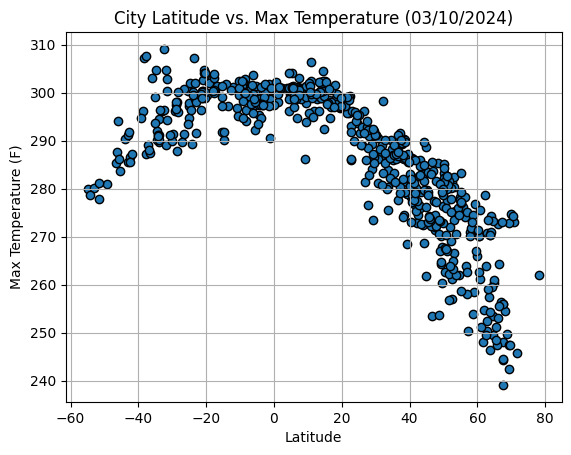

In [44]:
latitude_data = [city["Lat"] for city in city_data]
temperature_data = [city["Max Temp"] for city in city_data]

# Build scatter plot for latitude vs. temperature
plt.scatter(latitude_data, temperature_data, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/10/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

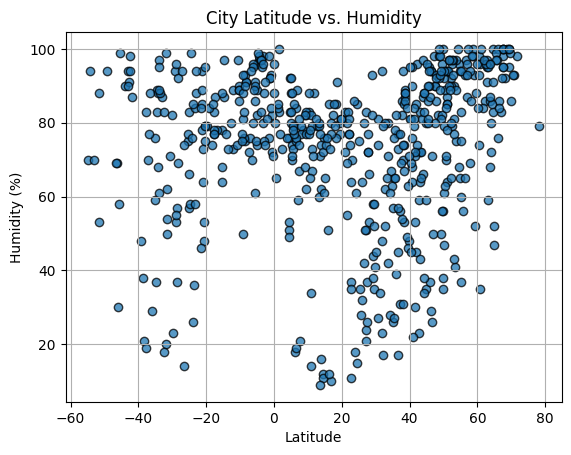

In [45]:
# Extract latitude and humidity data from city_data
latitude_data = [city["Lat"] for city in city_data]
humidity_data = [city["Humidity"] for city in city_data]

# Build the scatter plot for latitude vs. humidity
plt.scatter(latitude_data, humidity_data, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

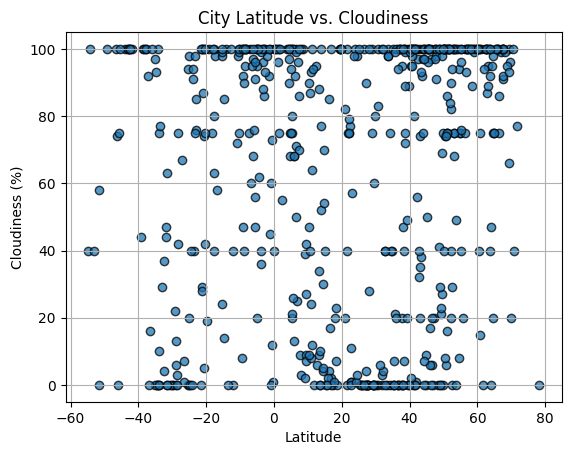

In [46]:
# Build the scatter plots for latitude vs. cloudiness
# Extract latitude and cloudiness data from city_data
cloudiness_data = [city["Cloudiness"] for city in city_data]

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(latitude_data, cloudiness_data, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

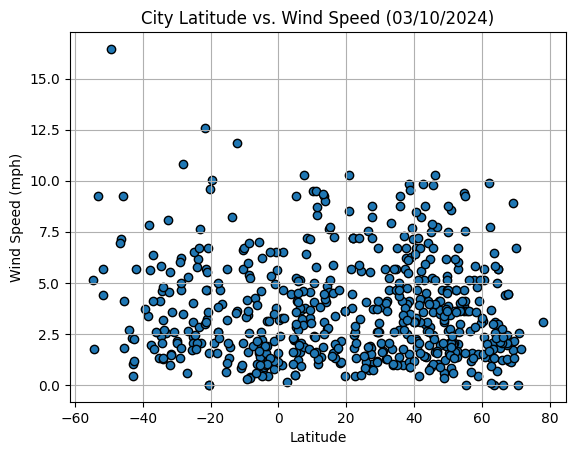

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude_data, [city["Wind Speed"] for city in city_data], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/10/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter city_data to get only Northern Hemisphere data
northern_hemi_data = [city for city in city_data if city["Lat"] >= 0]

# Create DataFrame with Northern Hemisphere data
northern_hemi_df = pd.DataFrame(northern_hemi_data)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolayevsk-on-amure,53.1406,140.7300,266.58,81,68,2.02,RU,1710118662
1,marsh harbour,26.5412,-77.0636,296.27,80,100,7.53,BS,1710118662
2,albany,42.6001,-73.9662,274.45,72,97,3.58,US,1710118489
3,wailua homesteads,22.0669,-159.3780,295.79,77,75,7.20,US,1710118663
4,batala,31.8186,75.2028,287.03,48,3,1.27,IN,1710118663


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter city_data to get only Southern Hemisphere data
southern_hemi_data = [city for city in city_data if city["Lat"] < 0]

# Create DataFrame with Southern Hemisphere data
southern_hemi_df = pd.DataFrame(southern_hemi_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,294.44,97,75,2.57,ZA,1710118662
1,port-aux-francais,-49.3500,70.2167,280.90,94,100,16.45,TF,1710118662
2,tolanaro,-25.0319,46.9987,297.19,83,20,3.09,MG,1710118663
3,invercargill,-46.4000,168.3500,287.60,69,74,7.15,NZ,1710118665
4,ushuaia,-54.8000,-68.3000,279.96,70,40,5.14,AR,1710118367


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7874748971411276


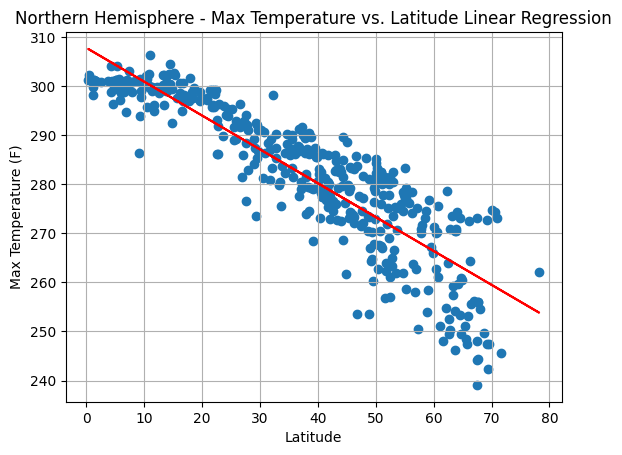

In [51]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression", 
                       "Latitude", "Max Temperature (F)", (6,10))
# Show plot
plt.show()


The r-value is: 0.34556449782312476


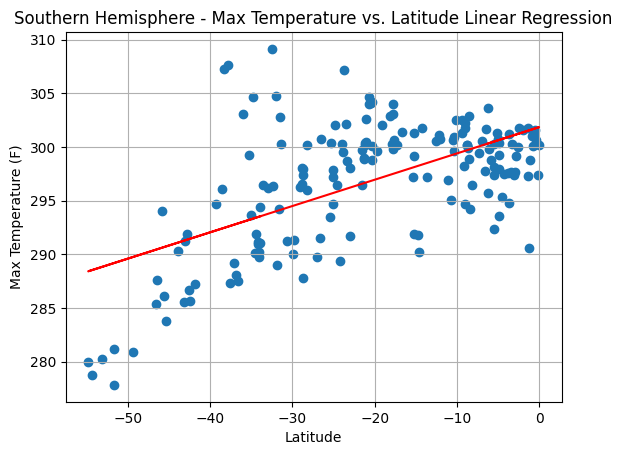

In [52]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression", 
                       "Latitude", "Max Temperature (F)", (-50,80))
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between temperature and latitude in the southern hemisphere, and a strong
one in the northern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09813001060779998


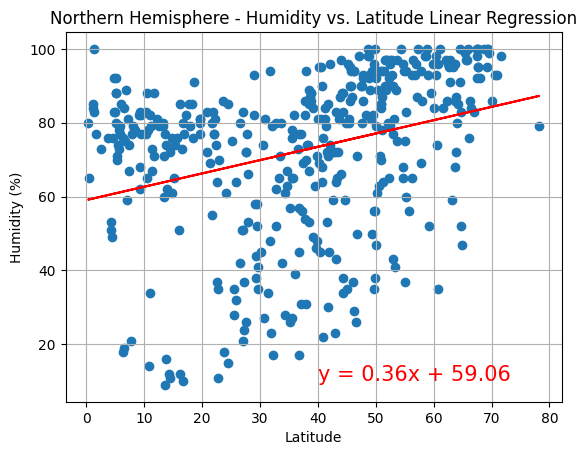

In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression", 
                       "Latitude", "Humidity (%)", (40,10))

The r-value is: 0.09455097397941437


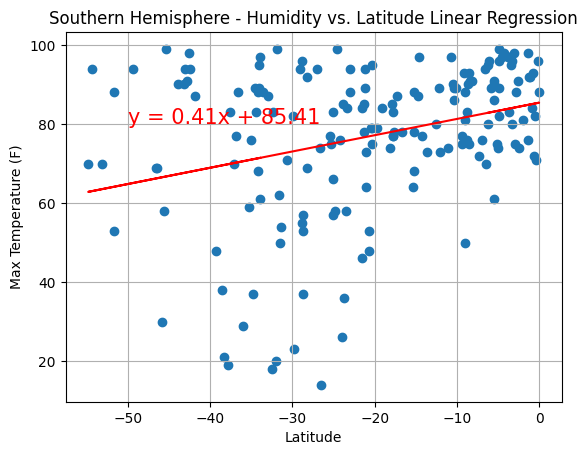

In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression", 
                       "Latitude", "Max Temperature (F)", (-50,80))

**Discussion about the linear relationship:** Humidity has a very weak correlation with latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.053424403510613575


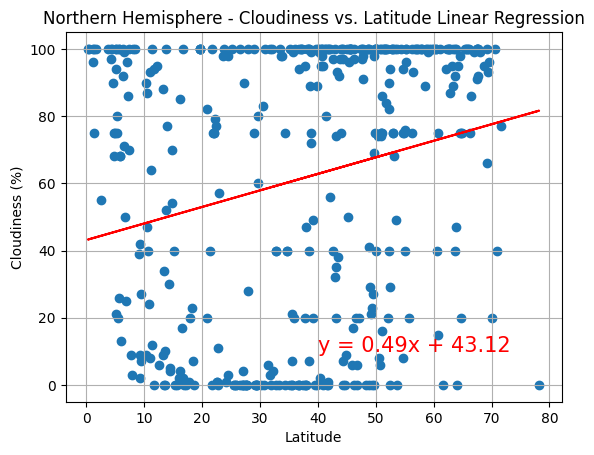

In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", (40,10))

The r-value is: 0.045336412630598275


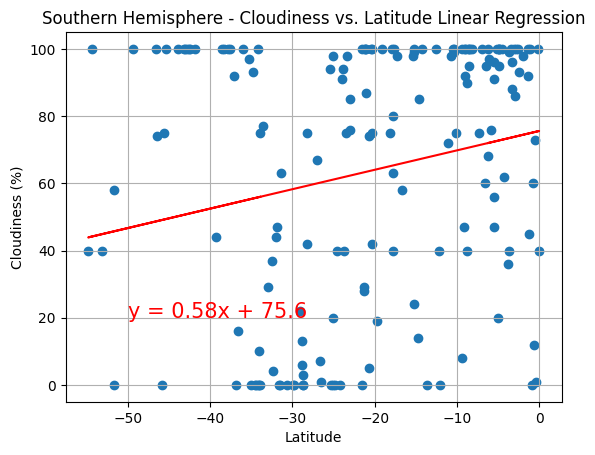

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** There is nearly no correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006858908154306079


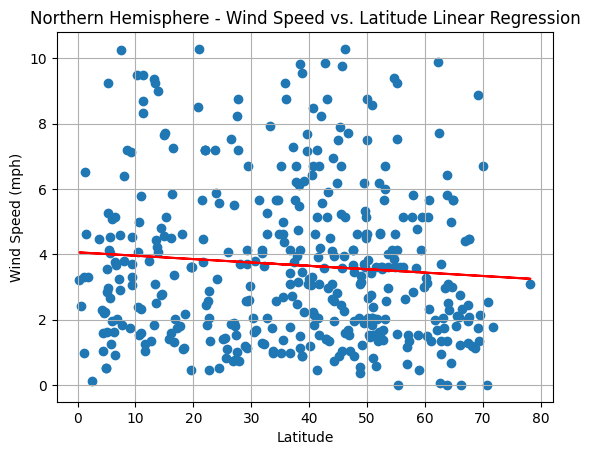

In [57]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (mph)", (40,25))

The r-value is: 0.05294268833973846


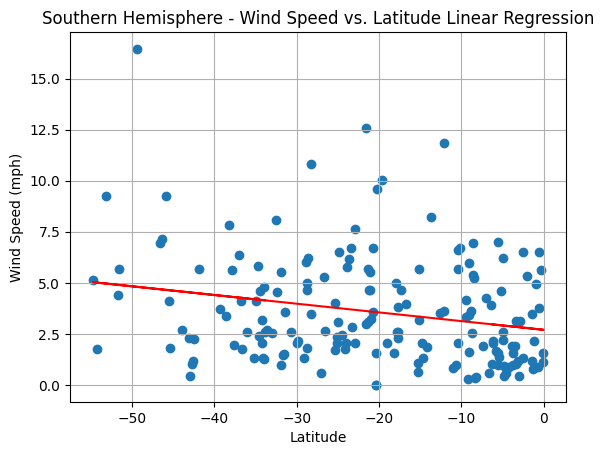

In [58]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (mph)", (-50,20))

**Discussion about the linear relationship:** There is nearly no correlation between wind speed and latitude